In [444]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import math
import warnings
warnings.filterwarnings('ignore')
     

In [445]:
ross_store=pd.read_csv(r'C:\Users\angad\OneDrive\Desktop\Reatil prediction\train.csv')

In [446]:
ross_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-17,4852,519,1,1,0,0,303445
1,2,5,2015-07-17,4518,495,1,1,0,1,959585
2,3,5,2015-07-17,6679,673,1,1,0,1,739744
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001
4,5,5,2015-07-17,4355,513,1,1,0,1,981931


In [447]:
store=pd.read_csv(r'C:\Users\angad\OneDrive\Desktop\Reatil prediction\store.csv')

In [448]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Dataset Rows & Columns count# 

In [449]:
ross_store.shape

(1001599, 10)

In [450]:
store.shape

(1115, 10)

In [451]:
ross_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001599 entries, 0 to 1001598
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1001599 non-null  int64 
 1   DayOfWeek      1001599 non-null  int64 
 2   Date           1001599 non-null  object
 3   Sales          1001599 non-null  int64 
 4   Customers      1001599 non-null  int64 
 5   Open           1001599 non-null  int64 
 6   Promo          1001599 non-null  int64 
 7   StateHoliday   1001599 non-null  object
 8   SchoolHoliday  1001599 non-null  int64 
 9   Id             1001599 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 76.4+ MB


In [452]:
# Date Datatype has to be updated 

In [453]:
store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [454]:

# ross_store Dataset Duplicate Value Count
ross_store.duplicated().any()

False

In [455]:

# store Dataset Duplicate Value Count
store.duplicated().any()

False

In [456]:
ross_store.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64

In [457]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [458]:
ross_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Id
count,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06
mean,5.584364e+02,3.998315e+00,5.770573e+03,6.333030e+02,8.296454e-01,3.818944e-01,1.734596e-01,5.085189e+05
std,3.219092e+02,1.997350e+00,3.852568e+03,4.649430e+02,3.759442e-01,4.858511e-01,3.786443e-01,2.934647e+05
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.722000e+03,4.040000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.544410e+05
50%,5.580000e+02,4.000000e+00,5.741000e+03,6.100000e+02,1.000000e+00,0.000000e+00,0.000000e+00,5.088100e+05
75%,8.380000e+02,6.000000e+00,7.854000e+03,8.380000e+02,1.000000e+00,1.000000e+00,0.000000e+00,7.626425e+05
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.017207e+06


In [459]:
ross_store = ross_store.drop(columns=['Id'])

In [460]:
ross_store.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-17,4852,519,1,1,0,0
1,2,5,2015-07-17,4518,495,1,1,0,1
2,3,5,2015-07-17,6679,673,1,1,0,1
3,4,5,2015-07-17,10514,1343,1,1,0,1
4,5,5,2015-07-17,4355,513,1,1,0,1


In [461]:
ross_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06
mean,5.584364e+02,3.998315e+00,5.770573e+03,6.333030e+02,8.296454e-01,3.818944e-01,1.734596e-01
std,3.219092e+02,1.997350e+00,3.852568e+03,4.649430e+02,3.759442e-01,4.858511e-01,3.786443e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.722000e+03,4.040000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.741000e+03,6.100000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.854000e+03,8.380000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [462]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


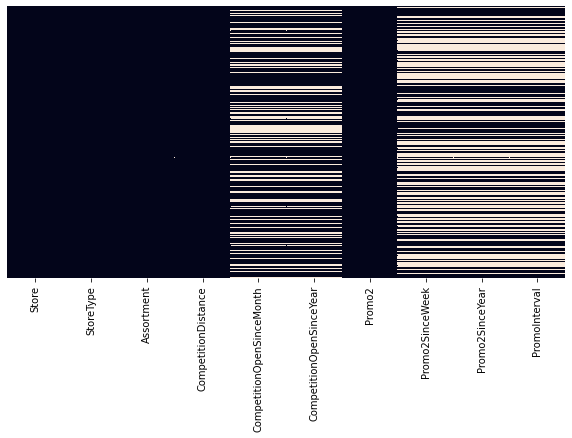

In [463]:


# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(store.isnull(),cbar=False,yticklabels=False)
plt.show()
     

2. Understanding Your Variables

In [464]:
ross_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [465]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [466]:
# unique values
n = ross_store.nunique(axis=0)

In [467]:
n

Store             1115
DayOfWeek            7
Date               928
Sales            21693
Customers         4083
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [468]:
n = store.nunique(axis=0)

In [469]:

n

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [470]:
#Understanding Your Variables

In [471]:
ross_store.columns 

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [472]:
store.columns 

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [473]:
store.drop(columns=['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'],axis=1,inplace=True)

In [474]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2'], dtype='object')

In [475]:
store.CompetitionDistance

0        1270.0
1         570.0
2       14130.0
3         620.0
4       29910.0
         ...   
1110     1900.0
1111     1880.0
1112     9260.0
1113      870.0
1114     5350.0
Name: CompetitionDistance, Length: 1115, dtype: float64

In [476]:
#filling null values in competitiondistance column with median
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(),inplace=True)

In [477]:
store.isnull()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1110,False,False,False,False,False
1111,False,False,False,False,False
1112,False,False,False,False,False
1113,False,False,False,False,False


In [478]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   object 
 2   Assortment           1115 non-null   object 
 3   CompetitionDistance  1115 non-null   float64
 4   Promo2               1115 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 43.7+ KB


In [479]:
data=ross_store.merge(store,on='Store', how='left')

In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001599 entries, 0 to 1001598
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1001599 non-null  int64  
 1   DayOfWeek            1001599 non-null  int64  
 2   Date                 1001599 non-null  object 
 3   Sales                1001599 non-null  int64  
 4   Customers            1001599 non-null  int64  
 5   Open                 1001599 non-null  int64  
 6   Promo                1001599 non-null  int64  
 7   StateHoliday         1001599 non-null  object 
 8   SchoolHoliday        1001599 non-null  int64  
 9   StoreType            1001599 non-null  object 
 10  Assortment           1001599 non-null  object 
 11  CompetitionDistance  1001599 non-null  float64
 12  Promo2               1001599 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 107.0+ MB


In [481]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-17,4852,519,1,1,0,0,c,a,1270.0,0
1,2,5,2015-07-17,4518,495,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-17,6679,673,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-17,10514,1343,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-17,4355,513,1,1,0,1,a,a,29910.0,0


In [482]:
data.shape

(1001599, 13)

In [483]:
data['Date']=pd.to_datetime(data['Date'])

In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001599 entries, 0 to 1001598
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1001599 non-null  int64         
 1   DayOfWeek            1001599 non-null  int64         
 2   Date                 1001599 non-null  datetime64[ns]
 3   Sales                1001599 non-null  int64         
 4   Customers            1001599 non-null  int64         
 5   Open                 1001599 non-null  int64         
 6   Promo                1001599 non-null  int64         
 7   StateHoliday         1001599 non-null  object        
 8   SchoolHoliday        1001599 non-null  int64         
 9   StoreType            1001599 non-null  object        
 10  Assortment           1001599 non-null  object        
 11  CompetitionDistance  1001599 non-null  float64       
 12  Promo2               1001599 non-null  int64         
dt

In [485]:
data['Year']=data['Date'].dt.year

In [486]:
data['Month']=data['Date'].dt.month

In [487]:
data['Week_num']=data['Date'].dt.week

In [488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001599 entries, 0 to 1001598
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1001599 non-null  int64         
 1   DayOfWeek            1001599 non-null  int64         
 2   Date                 1001599 non-null  datetime64[ns]
 3   Sales                1001599 non-null  int64         
 4   Customers            1001599 non-null  int64         
 5   Open                 1001599 non-null  int64         
 6   Promo                1001599 non-null  int64         
 7   StateHoliday         1001599 non-null  object        
 8   SchoolHoliday        1001599 non-null  int64         
 9   StoreType            1001599 non-null  object        
 10  Assortment           1001599 non-null  object        
 11  CompetitionDistance  1001599 non-null  float64       
 12  Promo2               1001599 non-null  int64         
 1

In [489]:
#Outlier treatment 

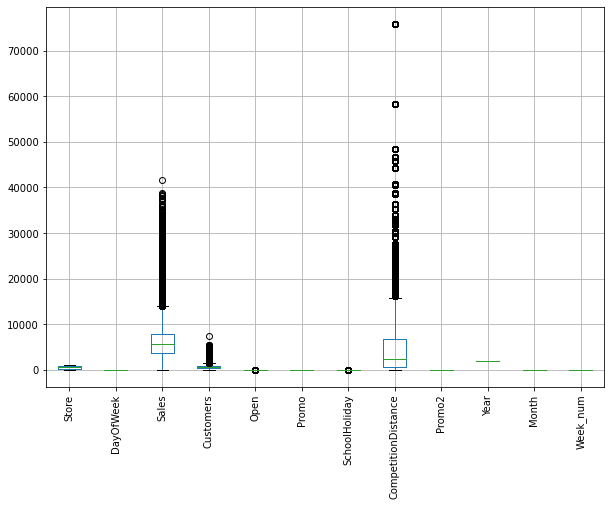

In [490]:
plt.figure(figsize=(10,7))
data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

In [491]:
# Sales , cop distance , customers contains Outliers

In [492]:
percentiles=[0.90,0.95,0.99]
data['CompetitionDistance'].describe(percentiles=percentiles)

count    1.001599e+06
mean     5.422417e+03
std      7.707785e+03
min      2.000000e+01
50%      2.325000e+03
90%      1.571000e+04
95%      2.039000e+04
99%      3.641000e+04
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [493]:
#From this we can see that 99% value is around 36K and maximum value is around 75K,so let's consider only value around 95%

In [494]:

#find out 90,95,99 percentile values of Sales Column
data['Sales'].describe(percentiles=percentiles)

count    1.001599e+06
mean     5.770573e+03
std      3.852568e+03
min      0.000000e+00
50%      5.741000e+03
90%      1.028800e+04
95%      1.213900e+04
99%      1.717100e+04
max      4.155100e+04
Name: Sales, dtype: float64

In [495]:
#In sales Feature also outliers is there and let's consider only those value around 95%

In [496]:

#find out 90,95,99 percentile values of Customers Column
data['Customers'].describe(percentiles=percentiles)

count    1.001599e+06
mean     6.333030e+02
std      4.649430e+02
min      0.000000e+00
50%      6.100000e+02
90%      1.117000e+03
95%      1.363000e+03
99%      2.268000e+03
max      7.388000e+03
Name: Customers, dtype: float64

In [497]:
#Here also let's consider value around 1400 that is around 95%

In [498]:
df=data.copy()

In [499]:
df.shape

(1001599, 16)

In [500]:
#let's consider all the values in which competition distance and sales,Customers values are around 95% percentile
df=df[df['CompetitionDistance']<20000]
df=df[df['Customers']<1400]
df=df[df['Sales']<13000].reset_index(drop=True)

In [501]:
df.shape

(894440, 16)

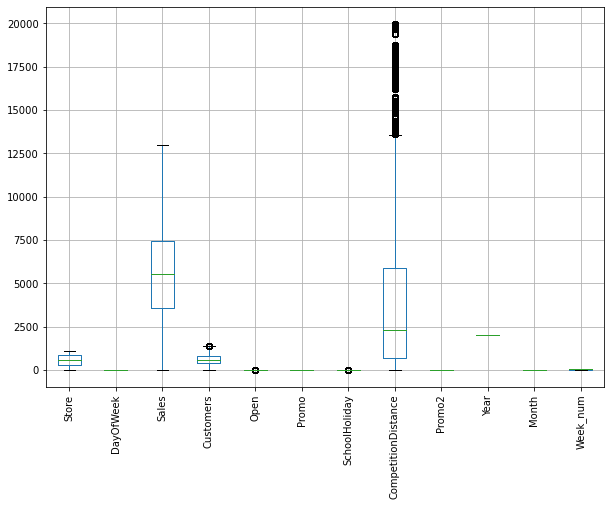

In [502]:
plt.figure(figsize=(10,7))
df.boxplot()
plt.xticks(rotation='vertical')
plt.show()

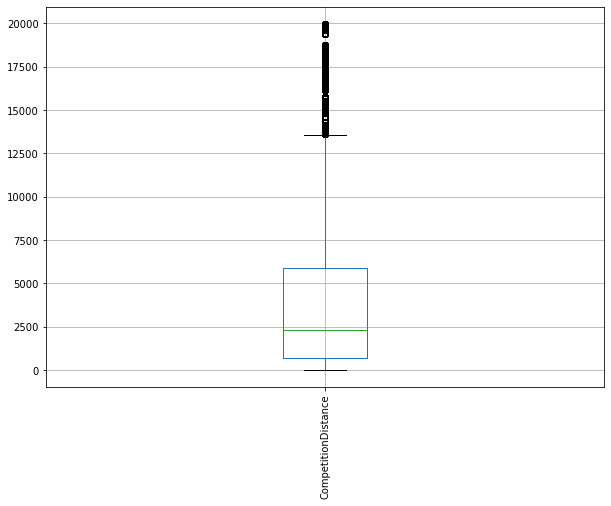

In [503]:
plt.figure(figsize=(10,7))
df.boxplot('CompetitionDistance')
plt.xticks(rotation='vertical')
plt.show()

In [504]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Week_num
0,1,5,2015-07-17,4852,519,1,1,0,0,c,a,1270.0,0,2015,7,29
1,2,5,2015-07-17,4518,495,1,1,0,1,a,a,570.0,1,2015,7,29
2,3,5,2015-07-17,6679,673,1,1,0,1,a,a,14130.0,1,2015,7,29
3,4,5,2015-07-17,10514,1343,1,1,0,1,c,c,620.0,0,2015,7,29
4,6,5,2015-07-17,4422,519,1,1,0,1,a,a,310.0,0,2015,7,29


In [505]:
df.SchoolHoliday.unique()

array([0, 1], dtype=int64)

In [506]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Week_num
0,1,5,2015-07-17,4852,519,1,1,0,0,c,a,1270.0,0,2015,7,29
1,2,5,2015-07-17,4518,495,1,1,0,1,a,a,570.0,1,2015,7,29
2,3,5,2015-07-17,6679,673,1,1,0,1,a,a,14130.0,1,2015,7,29
3,4,5,2015-07-17,10514,1343,1,1,0,1,c,c,620.0,0,2015,7,29
4,6,5,2015-07-17,4422,519,1,1,0,1,a,a,310.0,0,2015,7,29


In [507]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Week_num
0,1,5,2015-07-17,4852,519,1,1,0,0,c,a,1270.0,0,2015,7,29
1,2,5,2015-07-17,4518,495,1,1,0,1,a,a,570.0,1,2015,7,29
2,3,5,2015-07-17,6679,673,1,1,0,1,a,a,14130.0,1,2015,7,29
3,4,5,2015-07-17,10514,1343,1,1,0,1,c,c,620.0,0,2015,7,29
4,6,5,2015-07-17,4422,519,1,1,0,1,a,a,310.0,0,2015,7,29


In [523]:

#let's convert stateholiday into state_holiday yes(1) or no(0)
df['state_holiday'] = data['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)
     

In [525]:
df.state_holiday.unique()

array([0, 1], dtype=int64)

In [510]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Week_num,state_holiday
0,1,5,2015-07-17,4852,519,1,1,0,0,c,a,1270.0,0,2015,7,29,0
1,2,5,2015-07-17,4518,495,1,1,0,1,a,a,570.0,1,2015,7,29,0
2,3,5,2015-07-17,6679,673,1,1,0,1,a,a,14130.0,1,2015,7,29,0
3,4,5,2015-07-17,10514,1343,1,1,0,1,c,c,620.0,0,2015,7,29,0
4,6,5,2015-07-17,4422,519,1,1,0,1,a,a,310.0,0,2015,7,29,0


In [526]:
#drop stateholiday column from the dataset
df.drop(columns='StateHoliday',axis=1,inplace=True)
     

In [527]:
#4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [528]:
#Chart - 1 Sales Vs DayOfWeek

In [529]:

#creating a dataset where ['Sales']!=0
df1=df[df['Sales']!=0]

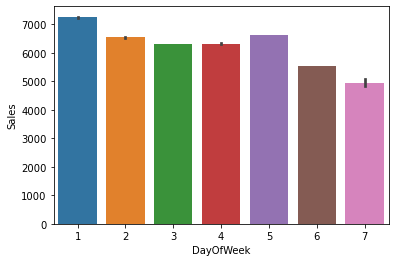

In [530]:

#Chart 1 Sales Per Day
#Bivariate Analysis
x=sns.barplot(x=df1['DayOfWeek'],y=df1['Sales'])

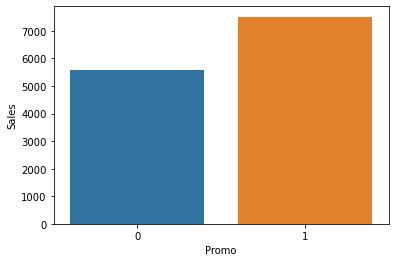

In [531]:
#Chart 1 Sales Per Day
#Bivariate Analysis
x=sns.barplot(x=df1['Promo'],y=df1['Sales'])

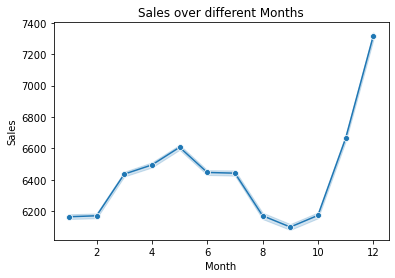

In [532]:

# Chart - Sales Over Months
#Bivariate Analysis
ax=sns.lineplot(x=df1['Month'],y=df1['Sales'],marker='o')
plt.title('Sales over different Months')
plt.show()
     

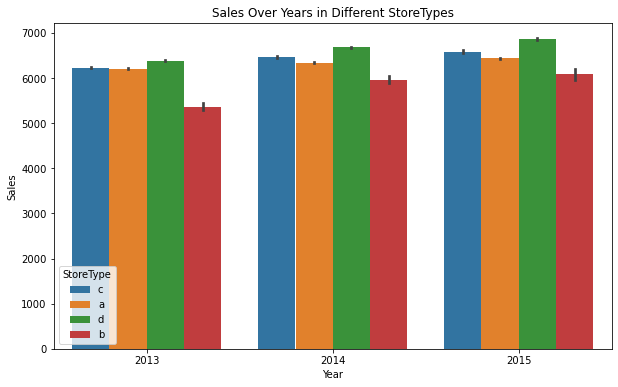

In [517]:

# Chart - 4 Sales Over Years in Different StoreTypes
#Multivariate Analysis
plt.figure(figsize=(10,6))
sns.barplot(x=df1['Year'],y=df1['Sales'],hue=df1['StoreType'])
plt.title('Sales Over Years in Different StoreTypes')
plt.show()
     

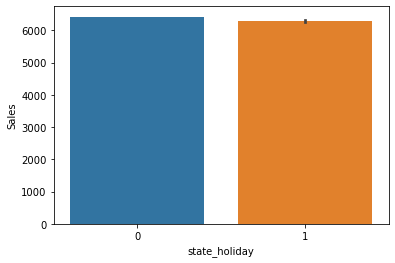

In [539]:

# Chart - 5 Sales vs SchoolHoliday
#Bivaraite Analysis
ax=sns.barplot(x=df1['state_holiday'],y=df1['Sales'])


Text(0.5, 1.0, 'Sales vs stateHoliday')

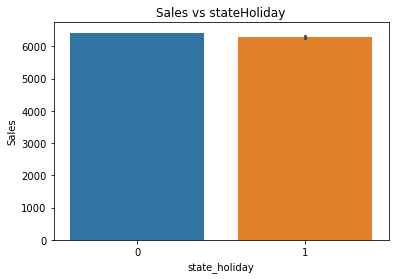

In [537]:
# Chart - 5 Sales vs SchoolHoliday
#Bivaraite Analysis
ax=sns.barplot(x=df1['state_holiday'],y=df1['Sales'])
plt.title('Sales vs stateHoliday')

In [538]:
df1.state_holiday.unique()

array([0, 1], dtype=int64)

In [540]:
df1.SchoolHoliday.unique()


array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Sales vs SchoolHoliday')

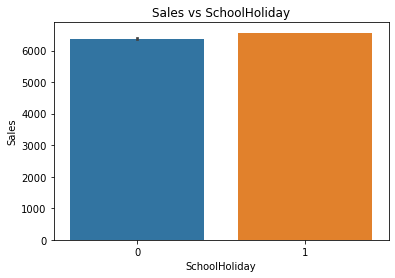

In [541]:
# Chart - 5 Sales vs SchoolHoliday
#Bivaraite Analysis
ax=sns.barplot(x=df1['SchoolHoliday'],y=df1['Sales'])
plt.title('Sales vs SchoolHoliday')

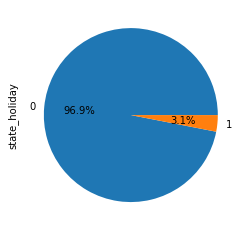

In [542]:
#plotting pie chart
df['state_holiday'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Sales Vs Assortment Level ')

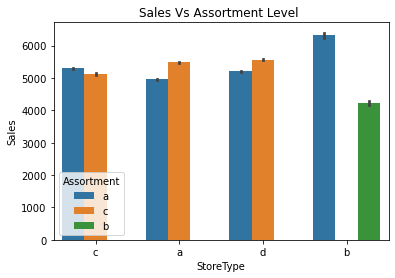

In [543]:
#Multivaraite Analysis
ax=sns.barplot(x=df['StoreType'],y=df['Sales'],hue=df['Assortment'])
plt.title('Sales Vs Assortment Level ')

Text(0.5, 1.0, 'Sales vs Customer')

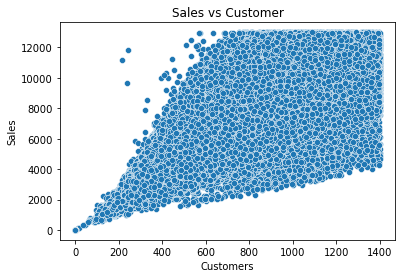

In [544]:
#Bivariate Analysis
sns.scatterplot(x=df['Customers'],y=df['Sales'])
plt.title('Sales vs Customer')

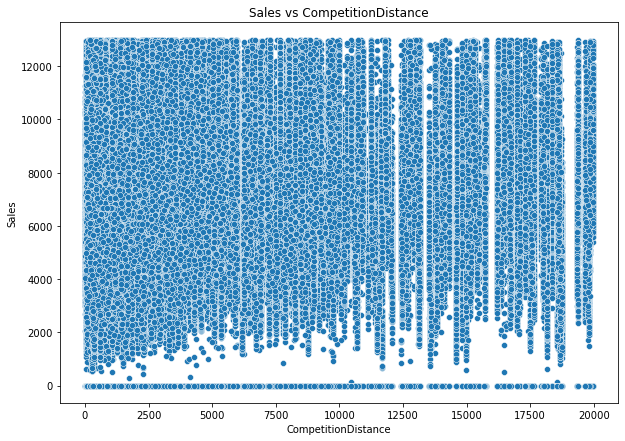

In [545]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['CompetitionDistance'],y=df['Sales'])
plt.title('Sales vs CompetitionDistance')
plt.show()

Text(0.5, 1.0, 'Sales vs Promo 2')

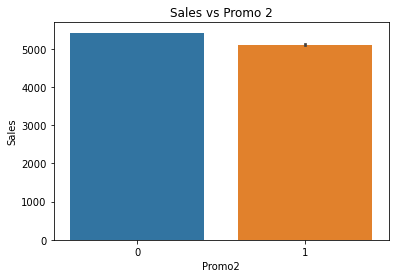

In [546]:
ax=sns.barplot(x=df['Promo2'],y=df['Sales'])
plt.title('Sales vs Promo 2')

<AxesSubplot:>

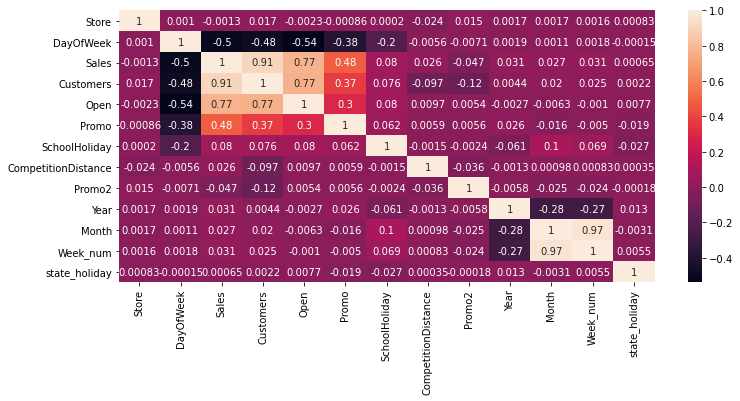

In [547]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,5))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [548]:
#It can be find out that Promo,Open and customer has positive correlation 
#with Sales means that if the shop is ruuning any promo more customers will visit the store there will be more sales
#Day of week is in negative correlation with sales that means on weekends Store will be closed,
#there will be no sales and competiton distance also some negative correlation.
#State holiday has very low negative correlation with sales as sales is not affected by state holiday
#same case with the school holiday
#Multicolinearity lies between promo,customers and open column

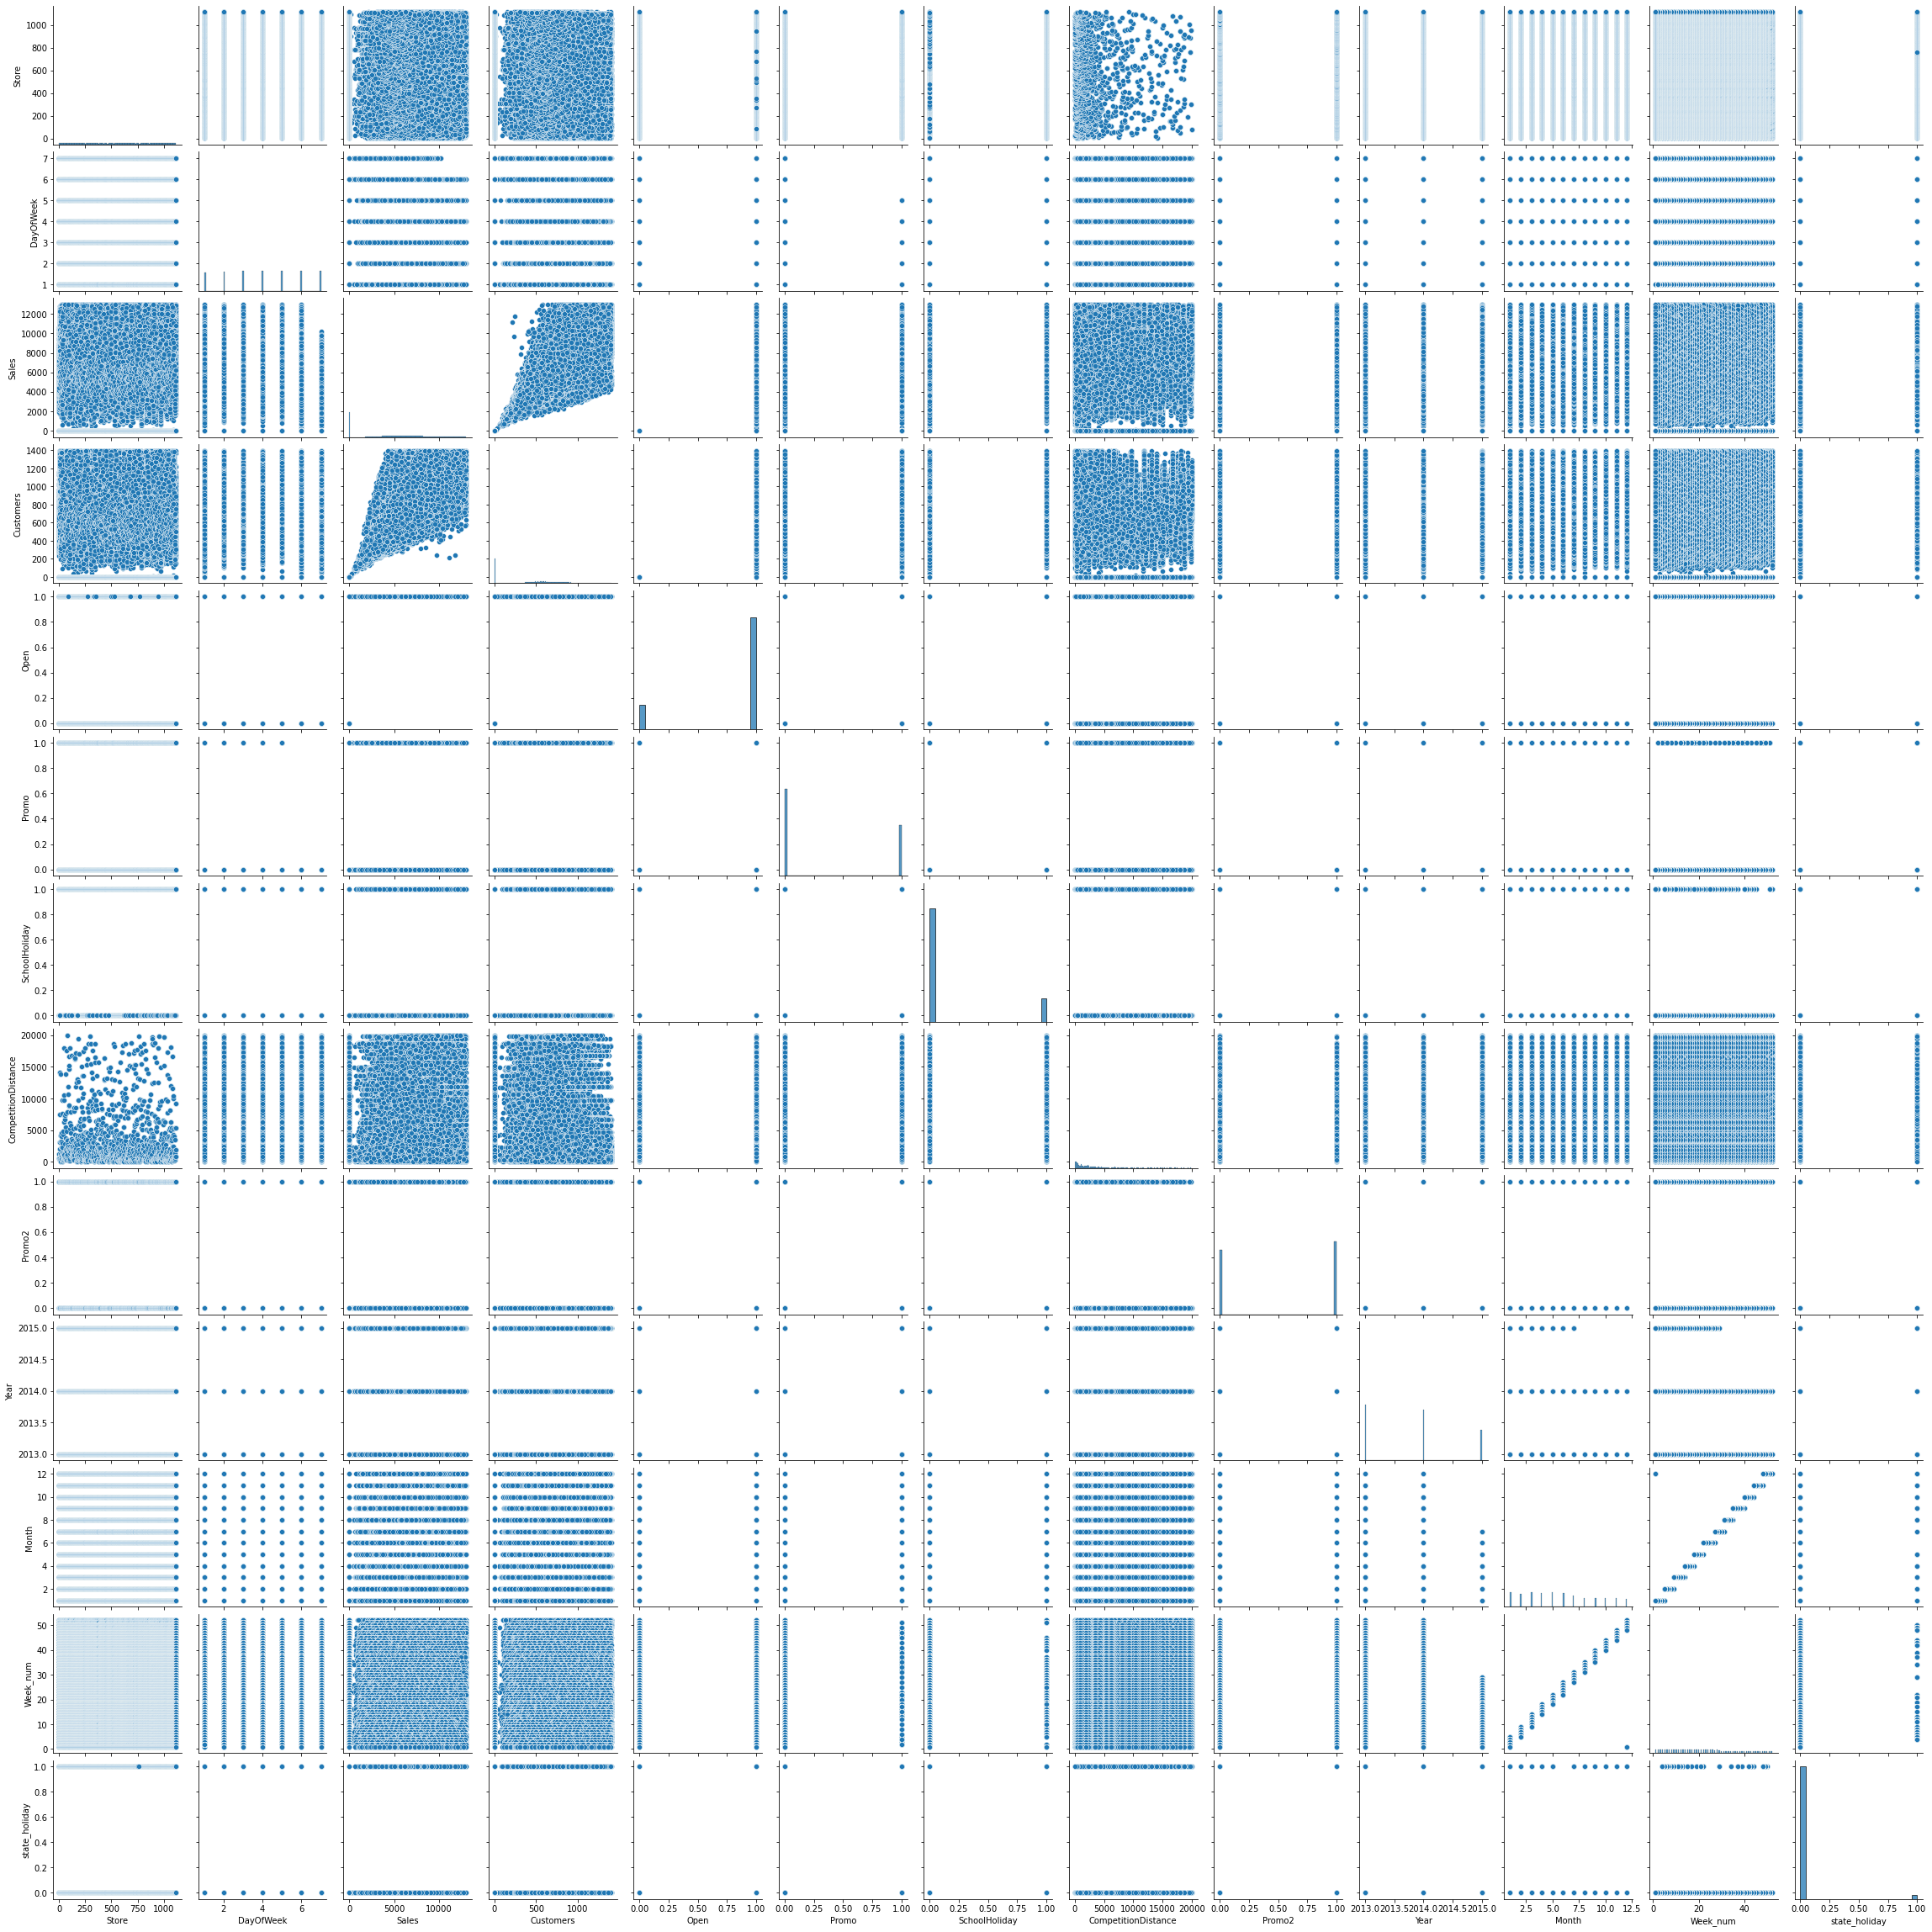

In [549]:

# Pair Plot visualization code
sns.pairplot(df)

In [550]:
#Null Hypothesis: There is no relationship between Sales and Customers

##Null Hypothesis: There is no relationship between Sales and Promo

#ALternative Hypothesis:There is relationship between Sales and Promo

#Null Hypothesis: There is no relationship between Sales and DayOfWeek

#ALternative Hypothesis: There is relationship between Sales and DayOfWeek

In [551]:
from scipy.stats import pearsonr

In [557]:
sales = df['Sales']
customers = df['Customers']
correlation, p_value = pearsonr(sales, customers)
correlation


0.9128157104352204

In [558]:
p_value

0.0

In [560]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Customers.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Customers.")


Reject the null hypothesis. There is a significant relationship between Sales and Customers.


In [561]:
#in orderto find out the correlation coefficient and P vlaue between the two features,
#i am using Pearson method.It helps me to find out the Corelation coeficient value which ranges from -1 and 1. 
#A Correlation value of 1 means perfect positive correlation, whereas correlation value of -1 means strong negative relationship and a correlation value of 0 means no relationship between the features. Also the P-value helps us to find out the statistical importance of the correlation.
#If the p-value is less than singnificance value which is generally taken as 0.05 indicates that the correlation is significant and provides us evidence to reject the null hypothesis



In [562]:
# Perform Statistical Test to obtain P-Valuefrom scipy.stats import pearsonr

sales = df['Sales']
promo = df['Promo']

correlation, p_value = pearsonr(sales, promo)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Promo.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Promo.")


Pearson correlation coefficient: 0.48017273903668556
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and Promo.


In [563]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = df['Sales']
Schoolholiday= df['SchoolHoliday']

correlation, p_value = pearsonr(sales, Schoolholiday)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and SchoolHoliday .")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and SchoolHoliday.")
     

Pearson correlation coefficient: 0.07996883027874846
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and SchoolHoliday .


In [565]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = df['Sales']
Open= df['Open']

correlation, p_value = pearsonr(sales, Open)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Open .")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Open.")
     

Pearson correlation coefficient: 0.7719572125422975
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and Open .


In [566]:
# Feature Engg and data preprocssing 

In [567]:

#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894440 entries, 0 to 894439
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                894440 non-null  int64         
 1   DayOfWeek            894440 non-null  int64         
 2   Date                 894440 non-null  datetime64[ns]
 3   Sales                894440 non-null  int64         
 4   Customers            894440 non-null  int64         
 5   Open                 894440 non-null  int64         
 6   Promo                894440 non-null  int64         
 7   SchoolHoliday        894440 non-null  int64         
 8   StoreType            894440 non-null  object        
 9   Assortment           894440 non-null  object        
 10  CompetitionDistance  894440 non-null  float64       
 11  Promo2               894440 non-null  int64         
 12  Year                 894440 non-null  int64         
 13  Month         

In [568]:

#let's change the datatype of CompetitionDistance to int
df['CompetitionDistance']=df['CompetitionDistance'].astype('int')

In [569]:

# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
Year                   0
Month                  0
Week_num               0
state_holiday          0
dtype: int64

In [571]:
#2. Handling Outliers this already done 

In [572]:
#3. Categorical Encoding

In [573]:

#Encode the cetagorical columns
#Encode StoreType,Assortment column using One Hot Encoding
encoded_df = pd.get_dummies(df, columns=['StoreType','Assortment'],dtype=int,drop_first=True)

In [574]:

#head of the data after categorical encoding
encoded_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Week_num,state_holiday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-17,4852,519,1,1,0,1270,0,2015,7,29,0,0,1,0,0,0
1,2,5,2015-07-17,4518,495,1,1,1,570,1,2015,7,29,0,0,0,0,0,0
2,3,5,2015-07-17,6679,673,1,1,1,14130,1,2015,7,29,0,0,0,0,0,0
3,4,5,2015-07-17,10514,1343,1,1,1,620,0,2015,7,29,0,0,1,0,0,1
4,6,5,2015-07-17,4422,519,1,1,1,310,0,2015,7,29,0,0,0,0,0,0


In [576]:
encoded_df = encoded_df.drop(columns=['Date'])

In [577]:
#head of the data after categorical encoding
encoded_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Week_num,state_holiday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,4852,519,1,1,0,1270,0,2015,7,29,0,0,1,0,0,0
1,2,5,4518,495,1,1,1,570,1,2015,7,29,0,0,0,0,0,0
2,3,5,6679,673,1,1,1,14130,1,2015,7,29,0,0,0,0,0,0
3,4,5,10514,1343,1,1,1,620,0,2015,7,29,0,0,1,0,0,1
4,6,5,4422,519,1,1,1,310,0,2015,7,29,0,0,0,0,0,0


In [579]:
#4. Feature Manipulation & Selection

In [580]:

# Manipulate Features to minimize feature correlation and create new features
#let's calculate the VIF to find Multicolinearity between the features

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [582]:
X=encoded_df[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Year', 'Month',
       'Week_num', 'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]
vif = pd.DataFrame()

In [584]:
vif["Variable"] = X.columns

In [585]:
vif

,Variable
0,Store
1,DayOfWeek
2,Customers
3,Open
4,Promo
5,SchoolHoliday
6,CompetitionDistance
7,Promo2
8,Year
9,Month


In [587]:
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               Variable        VIF
0                 Store   3.984693
1             DayOfWeek   8.141475
2             Customers  11.029667
3                  Open  16.017937
4                 Promo   1.989608
5         SchoolHoliday   1.296089
6   CompetitionDistance   1.944919
7                Promo2   2.250442
8                  Year  31.413337
9                 Month  63.816262
10             Week_num  56.955815
11        state_holiday   1.033963
12          StoreType_b   1.770084
13          StoreType_c   1.279926
14          StoreType_d   1.878068
15         Assortment_b   1.749247
16         Assortment_c   1.993983


In [588]:
#Month have very high corelation with week number i,e 0.97 and their respective corelation with sales is 0.027 and 0.032,so we will keep Week_no feature
#year feature is has also high VIF So we remove this also
#Customer and open also have high VIF value and also correlation with each other is 0.77 and with sales is 0.91 and 0.77 respectively so we will drop open column

In [590]:

#calculating VIF again
X=encoded_df[['Store', 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month',
        'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               Variable       VIF
0                 Store  3.570175
1             DayOfWeek  3.787464
2             Customers  3.598748
3                 Promo  1.905225
4         SchoolHoliday  1.243258
5   CompetitionDistance  1.850358
6                Promo2  2.029906
7                 Month  3.673343
8         state_holiday  1.031068
9           StoreType_b  1.768217
10          StoreType_c  1.270284
11          StoreType_d  1.790998
12         Assortment_b  1.747816
13         Assortment_c  1.973598


In [591]:
#thershold for Vif = 5

In [592]:

# Selecting only those features which are important
new_df=encoded_df[[ 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month',
        'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c','Sales']]

In [593]:
new_df.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,state_holiday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Sales
0,5,519,1,0,1270,0,7,0,0,1,0,0,0,4852
1,5,495,1,1,570,1,7,0,0,0,0,0,0,4518
2,5,673,1,1,14130,1,7,0,0,0,0,0,0,6679
3,5,1343,1,1,620,0,7,0,0,1,0,0,1,10514
4,5,519,1,1,310,0,7,0,0,0,0,0,0,4422


In [594]:


#let's create a dataframe where sales!=0
new_df1=new_df[new_df['Sales']!=0]

In [595]:

# Let's find out skewness of continous feature
new_df1[['Customers','CompetitionDistance','Sales']].skew()

Customers              0.563926
CompetitionDistance    1.528606
Sales                  0.465400
dtype: float64

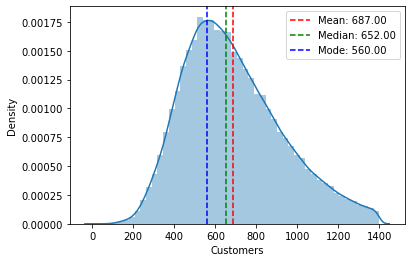

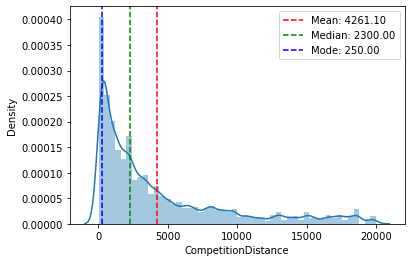

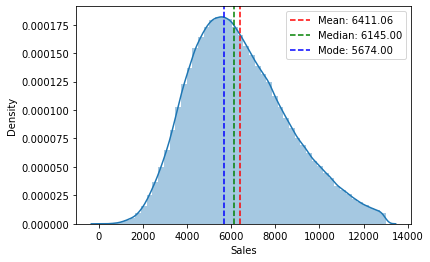

In [596]:
# Let's find out skewness of continous feature
columns=['Customers','CompetitionDistance','Sales']
for col in columns:
  sns.distplot(new_df1[col])
  plt.axvline(new_df1[col].mean(), color='red', linestyle='--', label=f'Mean: {new_df1[col].mean():.2f}')
  plt.axvline(new_df1[col].median(), color='green', linestyle='--', label=f'Median: {new_df1[col].median():.2f}')
  plt.axvline(new_df1[col].mode()[0], color='blue', linestyle='--', label=f'Mode: {new_df1[col].mode()[0]:.2f}')
  plt.legend()
  plt.show()

In [597]:

#TransFrom the data using SQRT transformation
new_df1['CompetitionDistance']=np.sqrt(new_df1['CompetitionDistance'])
new_df1['Customers']=np.sqrt(new_df1['Customers'])
new_df1['Sales']=np.sqrt(new_df1['Sales'])

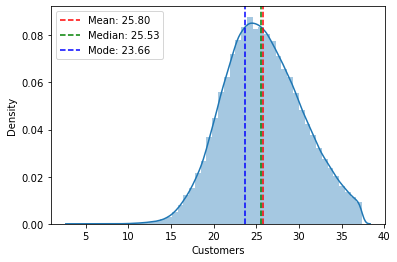

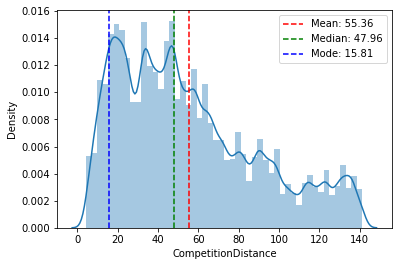

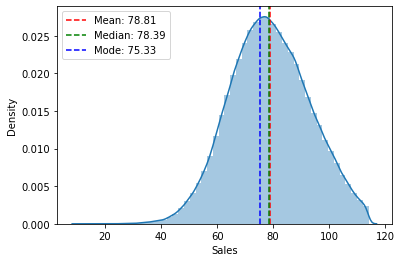

In [598]:
# Let's find out skewness of continous feature
columns=['Customers','CompetitionDistance','Sales']
for col in columns:
  sns.distplot(new_df1[col])
  plt.axvline(new_df1[col].mean(), color='red', linestyle='--', label=f'Mean: {new_df1[col].mean():.2f}')
  plt.axvline(new_df1[col].median(), color='green', linestyle='--', label=f'Median: {new_df1[col].median():.2f}')
  plt.axvline(new_df1[col].mode()[0], color='blue', linestyle='--', label=f'Mode: {new_df1[col].mode()[0]:.2f}')
  plt.legend()
  plt.show()

In [599]:
#Data scaling 

In [600]:
#before Scaling let's find out dependent and independent features
X=new_df1.drop(columns=['Sales']) #idependent Variable/feature
y=new_df1[['Sales']]                #Dependent Variable

In [601]:
print(X.shape)
print(y.shape)

(731833, 13)
(731833, 1)


In [602]:

#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit and transform
X=sc.fit_transform(X)

In [607]:

# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((585466, 13), (146367, 13), (585466, 1), (146367, 1))

In [609]:
#7. ML Model Implementation

In [610]:

# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

In [611]:

#coefficients
lr.coef_

array([[-1.76634982e-02,  1.23529068e+01,  2.89453997e+00,
         4.91830055e-02,  2.05489660e+00,  1.23576381e+00,
         2.77669950e-01,  6.89588790e-03, -5.74925915e-01,
        -4.45737304e-01,  3.08245745e+00, -1.16744963e+00,
         6.63181666e-01]])

In [673]:
y_test_predict

array([[ 73.27713867],
       [ 71.59060775],
       [ 82.75630203],
       ...,
       [ 81.59930578],
       [ 71.55186657],
       [109.51555069]])

In [676]:
x_test['pred']=y_test_predict

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [612]:


#intercept
lr.intercept_

array([78.80752826])

In [613]:
#1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [614]:

#importing labraries to check the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
     

In [615]:
def cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred):
  #mean_squared_error metrics
  MSE_train=mean_squared_error(y_train,y_train_pred)
  print('MSE train score is :',MSE_train)
  MSE_test=mean_squared_error(y_test,y_test_pred)
  print('MSE test score is :',MSE_test)

  #Root mean square error
  print('RMSE train Score: ',np.sqrt(MSE_train))
  print('RMSE test Score: ',np.sqrt(MSE_test))

  #R2 score
  r2_train=r2_score(y_train,y_train_pred)
  print('r2 train score: ',r2_train)
  r2_test=r2_score(y_test,y_test_pred)
  print('r2 test score: ',r2_test)

In [616]:

# calculating metrics
cal_metrics_score(y_train,y_train_predict,y_test,y_test_predict)

MSE train score is : 37.54876335778693
MSE test score is : 37.44015176959955
RMSE train Score:  6.12770457494378
RMSE test Score:  6.1188358181601465
r2 train score:  0.8123646688414008
r2 test score:  0.812844790098705


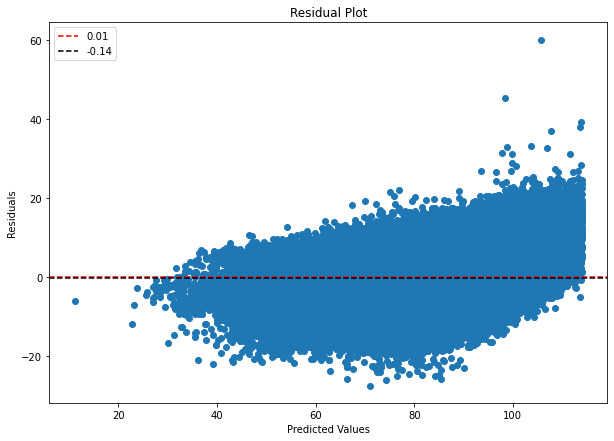

In [617]:

#plot residuals
residuals=y_test-y_test_predict
plt.figure(figsize=(10,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

In [618]:

#linear regression model achieved a reasonably good R-squared score of 81.2%, indicating that it explains a significant portion of the variance in the target variable and has low MSE,RMSE on both trainig and test sample.The residual plot, which is a graphical representation of the differences between the actual values (y_test) and the predicted values (y_test_predict) was also plotted.It helps us to visvalize the distribution of residuals.The residuals shows that residuls are scattered around mean or zero line that indicates the model presiction is unbiased.

#since the r2 score is not that let's go for cross validation and hyperparameter tunning

In [620]:
#2. Cross- Validation & Hyperparameter Tuning

In [621]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 1}
best score: 0.8123490672264737


In [622]:

# calculating metrics for Ridge
cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred)

MSE train score is : 37.548763358478574
MSE test score is : 37.440150309337035
RMSE train Score:  6.127704575000216
RMSE test Score:  6.118835698834953
r2 train score:  0.8123646688379446
r2 test score:  0.8128447973982411


In [623]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
lasso = Lasso()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_lasso_pred = grid_search.predict(x_train)
y_test_lasso_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.8118810829779426


In [625]:

#calculating metrics for Lasso Regressions
cal_metrics_score(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)
     

MSE train score is : 37.64302068770932
MSE test score is : 37.527526344193355
RMSE train Score:  6.135390834144905
RMSE test Score:  6.125971461261744
r2 train score:  0.811893654519422
r2 test score:  0.812408023523912


In [626]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
enet= ElasticNet()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(enet, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_enet_pred = grid_search.predict(x_train)
y_test_enet_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.8090271809045733


In [627]:


#calculating metrics for ElasticNet Regression
cal_metrics_score(y_train,y_train_enet_pred,y_test,y_test_enet_pred)

MSE train score is : 38.2138324165491
MSE test score is : 38.06683090686379
RMSE train Score:  6.181733771083085
RMSE test Score:  6.169832324047696
r2 train score:  0.8090412450605667
r2 test score:  0.8097121568178034


In [628]:
#ML Model - 2

In [629]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20)
# Fit the Algorithm
dt.fit(x_train,y_train)
# Predict on the model
y_train_dt_pred=dt.predict(x_train)
y_test_dt_pred=dt.predict(x_test)

In [630]:

# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dt_pred,y_test,y_test_dt_pred)

MSE train score is : 4.663371148579961
MSE test score is : 13.431889465227805
RMSE train Score:  2.1594840005380824
RMSE test Score:  3.6649542241653994
r2 train score:  0.9766966176371346
r2 test score:  0.9328568936444087


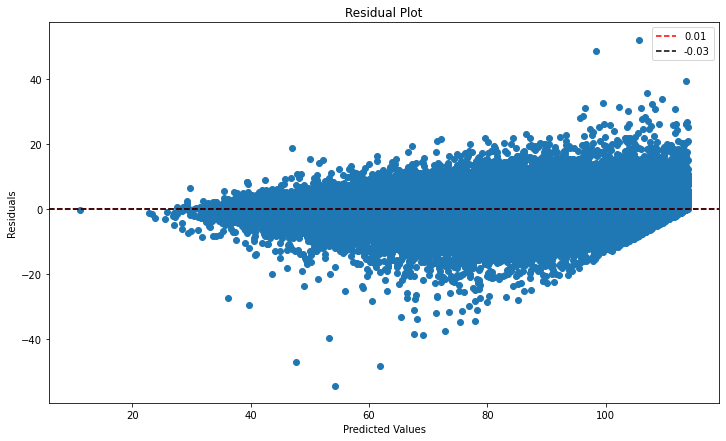

In [631]:

#plot residuals
y_test_dtt_pred= y_test_dt_pred.reshape(-1,1)
residuals=y_test-y_test_dtt_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

In [632]:


# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
dt=DecisionTreeRegressor()
param_grid={'max_depth': [17,18,19,20], 'min_samples_leaf': [5,6,7,8], 'min_samples_split': [1,3,4,5]}
gridsearch=GridSearchCV(dt,param_grid,scoring='r2', cv=3)
gridsearch.fit(x_train,y_train)
# Predict on the model
y_train_dtgs_pred=gridsearch.predict(x_train)
y_test_dtgs_pred=gridsearch.predict(x_test)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',gridsearch.best_params_)
best_score = print('best score:',gridsearch.best_score_)

best param: {'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 4}
best score: 0.933523837837844


In [633]:

# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=20)

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_train_rf_pred=rf.predict(x_train)
y_test_rf_pred=rf.predict(x_test)

In [634]:

# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_rf_pred,y_test,y_test_rf_pred)

MSE train score is : 3.6013023477114037
MSE test score is : 8.804725273177429
RMSE train Score:  1.8977097638235947
RMSE test Score:  2.967275732583244
r2 train score:  0.9820038931195604
r2 test score:  0.9559870852883996


In [637]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [639]:

#import the algorithm
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100,learning_rate=0.1, max_depth=13)
#fit the algorithm
xgb.fit(x_train,y_train)
# Predict on the mode
y_train_xgb_pred=xgb.predict(x_train)
y_test_xgb_pred=xgb.predict(x_test)

In [640]:

# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_xgb_pred,y_test,y_test_xgb_pred)
     

MSE train score is : 6.257355441865006
MSE test score is : 8.674632018653366
RMSE train Score:  2.5014706558073008
RMSE test Score:  2.9452728258437055
r2 train score:  0.9687313014992299
r2 test score:  0.9566373932921445


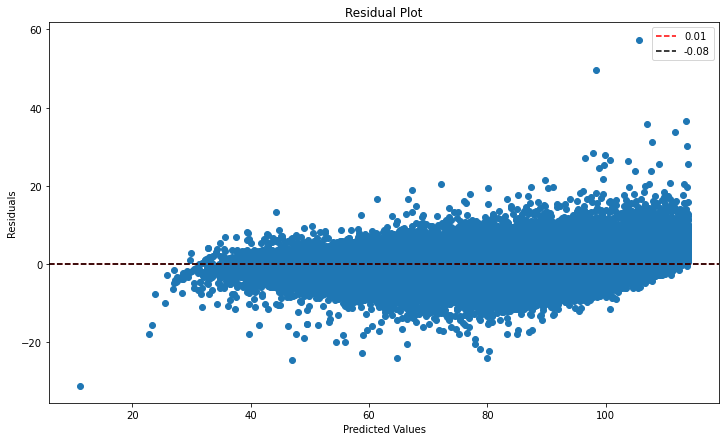

In [641]:

#plot residuals
y_test_xgbb_pred= y_test_xgb_pred.reshape(-1,1)
residuals=y_test-y_test_xgbb_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

In [642]:
# XGBoost with RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[13,14,15]}

# Train the model
xgb_grid=GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_grid.fit(x_train,y_train)

# Predict the output
y_train_xgbg_pred = xgb_grid.predict(x_train)
y_test_xgbg_pred = xgb_grid.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print('best param',xgb_grid.best_params_)
print('best score',xgb_grid.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  18 | elapsed:  1.1min remaining:   54.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.8min finished


best param {'learning_rate': 0.1, 'max_depth': 14}
best score -8.824583025557523


In [643]:
### Explain the model which you have used and the feature importance using any model explainability tool?

In [645]:
# Plotting the barplot to find out which feature is contributing the most
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100,learning_rate=0.1, max_depth=14)
# Train your XGBoost model
model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [661]:
importance = model.feature_importances_

In [660]:
importance 

array([0.00298759, 0.06208453, 0.06526612, 0.00099874, 0.01297303,
       0.01382721, 0.00137976, 0.00058213, 0.06248245, 0.01069921,
       0.26068407, 0.49556255, 0.01047258], dtype=float32)

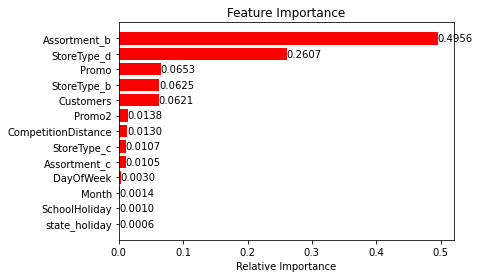

In [672]:
# Get the feature importance scores
importance = model.feature_importances_

indices = np.argsort(importance)


features=new_df.columns
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='red', align='center')

# Add numeric values on top of the bars
for i, v in enumerate(importance[indices]):
    plt.text(v, i, f'{v:.4f}', color='black', va='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()